**AUTOLIB**
# **DATA UNDERSTANDING**









**Importing our Libraries**

In [0]:
#Importing our Libraries
import pandas as pd
import numpy as np

In [0]:
#loading  our dataset and previewing it
url = 'http://bit.ly/Autolibdataset'
CAR = pd.read_csv(url)
CAR.head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


In [0]:
CAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14421829 entries, 0 to 14421828
Data columns (total 26 columns):
Unnamed: 0             int64
Address                object
Cars                   int64
Bluecar counter        int64
Utilib counter         int64
Utilib 1.4 counter     int64
Charge Slots           int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code            int64
Public name            object
Rental status          object
Scheduled at           object
Slots                  int64
Station type           object
Status                 object
Subscription status    object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
dtypes: int64(13), object(13)
memory usage: 2.8+ GB


In [0]:
CAR.shape

(14421829, 26)

In [0]:
CAR.isnull().head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [0]:
CAR.notnull().sum()

Unnamed: 0             14421829
Address                14421829
Cars                   14421829
Bluecar counter        14421829
Utilib counter         14421829
Utilib 1.4 counter     14421829
Charge Slots           14421829
Charging Status        14421829
City                   14421829
Displayed comment        322219
ID                     14421829
Kind                   14421829
Geo point              14421829
Postal code            14421829
Public name            14421829
Rental status          14421829
Scheduled at             111616
Slots                  14421829
Station type           14421829
Status                 14421829
Subscription status    14421829
year                   14421829
month                  14421829
day                    14421829
hour                   14421829
minute                 14421829
dtype: int64

In [0]:
CAR.describe()

,Unnamed: 0,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,1.442183e+07,14421829.0,14421829.0,1.442183e+07,1.442183e+07,1.442183e+07
mean,5.589901e+02,2.364280e+00,2.364280e+00,6.390992e-02,1.302421e-01,2.446222e-01,8.293731e+04,1.910348e+00,2018.0,4.0,4.975176e+00,1.153851e+01,2.947548e+01
std,3.230325e+02,2.045841e+00,2.045841e+00,2.576582e-01,3.746813e-01,5.378435e-01,8.873906e+03,1.909617e+00,0.0,0.0,2.593311e+00,6.838499e+00,1.730941e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500100e+04,0.000000e+00,2018.0,4.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.790000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.501300e+04,0.000000e+00,2018.0,4.0,3.000000e+00,6.000000e+00,1.400000e+01
50%,5.590000e+02,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.501900e+04,1.000000e+00,2018.0,4.0,5.000000e+00,1.200000e+01,2.900000e+01
75%,8.390000e+02,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.234000e+04,3.000000e+00,2018.0,4.0,7.000000e+00,1.700000e+01,4.400000e+01
max,1.118000e+03,7.000000e+00,7.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,9.588000e+04,7.000000e+00,2018.0,4.0,9.000000e+00,2.300000e+01,5.900000e+01


**DATA CLEANING**

In [0]:
#checking irrelevant data and dropping it.
# dropping display comment,schedule at,year,month
CAR.drop(["Unnamed: 0","Displayed comment","Scheduled at","year","month","City"], axis = 1, inplace=True)
# display the resulting dataframe
CAR.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,24 Rue Vulpian,3,3,1,0,1,operational,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,1,station,ok,nonexistent,1,0,0
1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,3,station,ok,nonexistent,1,0,0
2,4 Rue Charles Bossut,3,3,0,0,1,operational,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,2,station,ok,nonexistent,1,0,0
3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,1,station,ok,nonexistent,1,0,0
4,236 Boulevard Voltaire,1,1,0,0,1,operational,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,4,station,ok,nonexistent,1,0,0


In [0]:
CAR.shape

(14421829, 20)

In [0]:
CAR.head(2)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,24 Rue Vulpian,3,3,1,0,1,operational,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,1,station,ok,nonexistent,1,0,0
1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,3,station,ok,nonexistent,1,0,0


In [0]:
# checking for outliers using IQR
Q1 = CAR.quantile(0.25)
Q3 = CAR.quantile(0.75)
IQR =Q3-Q1
print(IQR)

Cars                      4.0
Bluecar counter           4.0
Utilib counter            0.0
Utilib 1.4 counter        0.0
Charge Slots              0.0
Postal code           17327.0
Slots                     3.0
day                       4.0
hour                     11.0
minute                   30.0
dtype: float64


In [0]:
#checking for ourliers using IQR
print(CAR < (Q1 - 1.5 * IQR)) |(CAR > (Q3 + 1.5 * IQR)).head()


          Address  Bluecar counter   Cars  ...    day   hour  minute
0           False            False  False  ...  False  False   False
1           False            False  False  ...  False  False   False
2           False            False  False  ...  False  False   False
3           False            False  False  ...  False  False   False
4           False            False  False  ...  False  False   False
5           False            False  False  ...  False  False   False
6           False            False  False  ...  False  False   False
7           False            False  False  ...  False  False   False
8           False            False  False  ...  False  False   False
9           False            False  False  ...  False  False   False
10          False            False  False  ...  False  False   False
11          False            False  False  ...  False  False   False
12          False            False  False  ...  False  False   False
13          False            False

TypeError: ignored

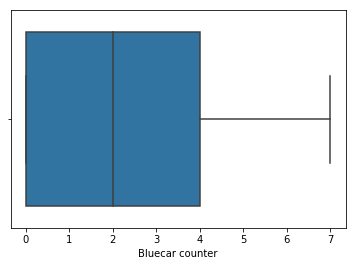

In [0]:
#using boxplot to check for  the outliers
import seaborn as sns
sns.boxplot(x = CAR['Bluecar counter'])

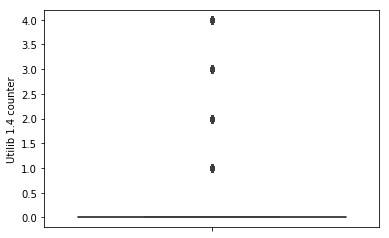

In [0]:
sns.boxplot(y=CAR['Utilib 1.4 counter'])

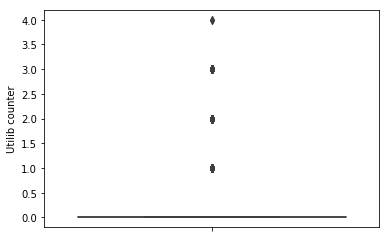

In [0]:
sns.boxplot(y=CAR['Utilib counter'])

In [0]:
#Checking and counting missing values
CAR.isnull().sum()

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
day                    0
hour                   0
minute                 0
dtype: int64

In [0]:
# checking for the shape of dataset after dropping irrelevant columns
CAR.shape

(14421829, 20)

In [0]:
CAR['Station type'].unique()

array(['station', 'full_station', 'subs_center'], dtype=object)

In [0]:
CAR['Subscription status'].unique()

array(['nonexistent', 'operational', 'broken'], dtype=object)

In [0]:
#Initialze columns to start with capital letters
CAR.columns = ['Adress','Cars','Bluecar counter','Utilib counter','Utilib 1.4 counter','Charge Slots','Charging Status','ID',
               'Kind','Geo point','Postal code','Public name','Rental status','Slots','Station type','Status','Subscription Status',
               'Day','Hour','Minute']
print(CAR).head(5)
			

                                             Adress  Cars  ...  Hour  Minute
0                                    24 Rue Vulpian     3  ...     0       0
1                        8 Boulevard Richard Lenoir     0  ...     0       0
2                              4 Rue Charles Bossut     3  ...     0       0
3                         3 avenue Claude Vellefaux     4  ...     0       0
4                            236 Boulevard Voltaire     1  ...     0       0
5                      44 Rue des Pirogues de Bercy     1  ...     0       0
6                       63 Boulevard Richard Lenoir     1  ...     0       0
7                                 43 Rue de Monceau     0  ...     0       0
8                10 Avenue du Docteur Arnold Netter     4  ...     0       0
9                    33 Avenue Pierre 1er de Serbie     2  ...     0       0
10                         2 Rue Houdart de Lamotte     3  ...     0       0
11                238 Rue du Faubourg Saint-Antoine     2  ...     0       0

AttributeError: ignored

# **ANALYSIS**

In [0]:
#What is the most popular hour for returning cars?

CAR.groupby(['Bluecar counter','Hour'])['Bluecar counter'].sum().sort_values(ascending=False).head(1)


Bluecar counter  Hour
5                5       466250
Name: Bluecar counter, dtype: int64

In [0]:
#What station is the most popular?
#Overall?
#At the most popular picking hour?
CAR.groupby(['ID','Bluecar counter'])['Bluecar counter'].sum().sort_values(ascending=False).head()

ID                                Bluecar counter
leplessisrobinson-galilee-16      7                  65058
meudon-jeannebraconnier-3         6                  44844
colombes-parclagravere-1          6                  38400
aulnaysousbois-arthurchevalier-7  5                  37450
nanterre-peupliers-13             6                  36852
Name: Bluecar counter, dtype: int64

In [0]:
CAR.groupby(['Bluecar counter','ID'])['Bluecar counter'].sum().sort_values(ascending=False).head(2)

Bluecar counter  ID                          
7                leplessisrobinson-galilee-16    65058
6                meudon-jeannebraconnier-3       44844
Name: Bluecar counter, dtype: int64

In [0]:
#What postal code is the most popular for picking up Bluecars? 
#Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?
CAR.groupby(['Postal code','Bluecar counter','Hour'])[['Bluecar counter']].count().sort_values(by='Hour',ascending=False).head(2)


,,,Bluecar counter
Postal code,Bluecar counter,Hour,
92340,2,23,268
92170,4,23,493


In [0]:
#what station is the popular at the picking hour?
CAR.groupby(['Hour','ID','Bluecar counter'])[['Bluecar counter']].count().sort_values(by='Hour', ascending=False).head()

Bluecar counter
Hour ID                         Bluecar counter                 
23   yerres-raymondpoincare-200 7                            104
     pantin-cartierbresson-84   2                             29
     pantin-anatolefrance-1     0                             60
                                1                            114
                                2                             64

In [0]:
#Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? 
#that could be asked earlier to push students to write modular code that can be used to query different things
#considering Utilib
CAR.groupby(['Postal code','Utilib counter','Hour'])['Utilib counter'].count().sort_values(ascending=False).head()

Postal code  Utilib counter  Hour
75015        0               17      31325
                             18      31226
                             21      31115
                             19      31091
                             15      31036
Name: Utilib counter, dtype: int64

In [0]:
#considering Utilib 1.4 counter
CAR.groupby(['Postal code','Utilib 1.4 counter','Hour'])['Utilib 1.4 counter'].count().sort_values(ascending=False).head()

Postal code  Utilib 1.4 counter  Hour
75015        0                   15      29427
                                 13      29275
                                 16      29164
                                 17      29066
                                 14      29058
Name: Utilib 1.4 counter, dtype: int64

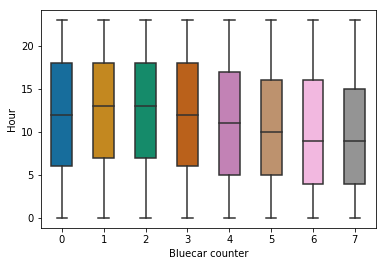

In [0]:
#distribution of bluecar counter against Hours and determing which is the likely hour this cars are picked 
  bplot = sns.boxplot(y='Hour', x='Bluecar counter', data=CAR, width=0.5, palette="colorblind")

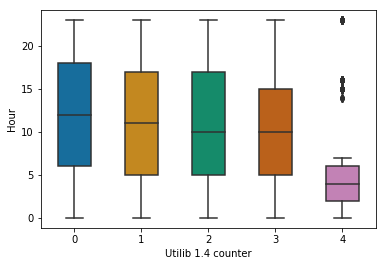

In [0]:
 bplot = sns.boxplot(y='Hour', x='Utilib 1.4 counter', data=CAR, width=0.5, palette="colorblind")

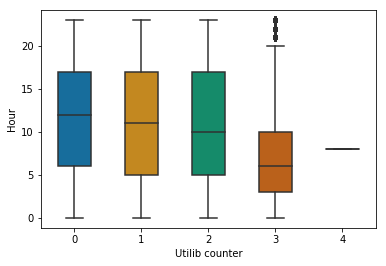

In [0]:
 bplot = sns.boxplot(y='Hour', x='Utilib counter', data=CAR, width=0.5, palette="colorblind")